In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


from tqdm import tqdm
import time

from collections import defaultdict
from itertools import product

from datetime import datetime
from datetime import date

import helper as h
import utils as u

In [2]:
df_train = pd.read_csv("../interim/01_train_data.csv", sep='|')
df_test = pd.read_csv("../interim/01_test_data.csv", sep='|')

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (88) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
display(df_train.head())
display(df_test.head())

,price,id,geo_block_len,geo_block_0,geo_block_1,geo_block_2,geo_block_3,geo_block_4,breadcrumbs_len,breadcrumbs_0,...,Адрес:_5,Адрес:_6,Адрес:_7,Адрес:_8,Адрес:_9,Адрес:_10,Адрес:_11,Адрес:_12,Адрес:_13,Адрес:_14
0,5.402084,34995,2,Лианозово,г. Москва,NaN,NaN,NaN,4,Москва,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.827990,15030,2,Ховрино,г. Москва,NaN,NaN,NaN,4,Москва,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.680000,37811,2,г. Москва,ул Лобачевского,NaN,NaN,NaN,3,Москва,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8.624435,31685,3,Ховрино,ул Дыбенко,г. Москва,NaN,NaN,5,Ховрино,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29.500000,56215,2,Даниловский,г. Москва,NaN,NaN,NaN,4,Москва,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,price,id,geo_block_len,geo_block_0,geo_block_1,geo_block_2,geo_block_3,geo_block_4,breadcrumbs_len,breadcrumbs_0,...,Адрес:_5,Адрес:_6,Адрес:_7,Адрес:_8,Адрес:_9,Адрес:_10,Адрес:_11,Адрес:_12,Адрес:_13,Адрес:_14
0,NaN,24242,2,Орехово-Борисово Южное,г. Москва,NaN,NaN,NaN,4,Москва,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,67622,2,ул Дыбенко,г. Москва,NaN,NaN,NaN,3,Москва,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,48993,1,г. Москва,NaN,NaN,NaN,NaN,2,Москва,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,31394,2,Хорошёво-Мнёвники,г. Москва,NaN,NaN,NaN,4,Москва,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,49832,1,г. Москва,NaN,NaN,NaN,NaN,2,Москва,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Analiza zmiennej niezależnej (y)

In [4]:
df_train['price'].describe()

count    22732.000000
mean        17.525508
std         44.079082
min          1.040000
25%          7.162347
50%          9.888750
75%         15.410000
max       3000.000015
Name: price, dtype: float64

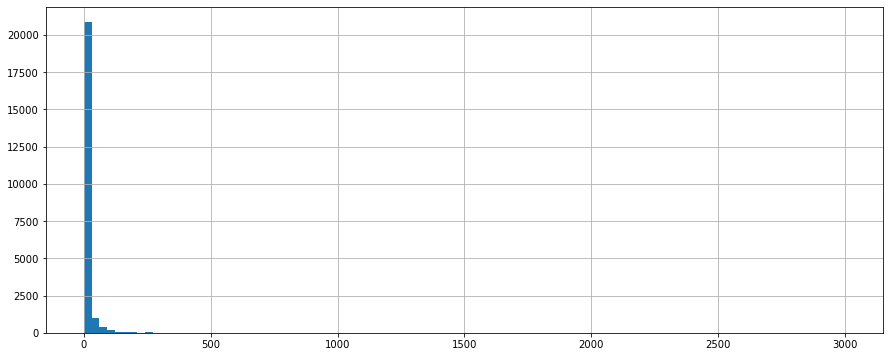

In [5]:
plt.figure(figsize=(15, 6))
df_train['price'].hist(bins=100)
plt.show()

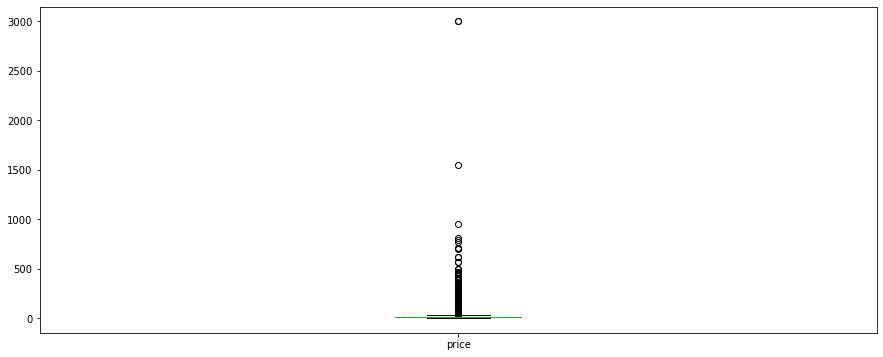

In [6]:
plt.figure(figsize=(15, 6))
df_train['price'].plot(kind='box')
plt.show()

In [7]:
df = pd.concat([df_train, df_test])
# Indeksy są od 0 w obu ramkach, więc muszę zrobić reset
df.reset_index(drop=True, inplace=True)
print(df.shape)
df.dtypes

(34180, 94)


price            float64
id                 int64
geo_block_len      int64
geo_block_0       object
geo_block_1       object
                  ...   
Адрес:_10        float64
Адрес:_11         object
Адрес:_12        float64
Адрес:_13         object
Адрес:_14        float64
Length: 94, dtype: object

In [8]:
col_idx =30
df[df.price > 500].iloc[:,0+col_idx:10+col_idx]

,Общая площадь:,Дата публикации:,Количество комнат:,Парковка:,Дата обновления:,Количество этажей:,Сдача:,Комиссия агенту:,Высота потолков:,Этаж:
814,482 м²,23 февраля 2018,7,подземная на 475 м/м,18 мая,7,4 кв. 2015 года,без комиссии,3.3 м,7/7
6977,574 м²,21 апреля,6,подземная 6-уровневая на 2100 м/м,17 мая,73,1 кв. 2009 года,без комиссии,3 м,75/73
6985,327 м²,27 апреля,5,-1,17 мая,8,-1,без комиссии,3.8 м,7/8
7269,1971.1 м²,16 мая,1,3-уровневая подземная на 1166 м/м,-1,53,-1,без комиссии,3.9 м,51/53
11626,574 м²,2 марта,6,подземная 6-уровневая на 2100 м/м,15 мая,73,-1,без комиссии,3 м,75/73
14942,270 м²,27 февраля,5,Имеется подземная охраняемая парковка на 78 ма...,17 мая,8,2 кв. 2008 года,без комиссии,3.2 м,5/8
16424,500 м²,10 августа 2018,6,"Трехуровневый подземный паркинг на более, чем ...",15 мая,-1,1 кв. 2010 года,без комиссии,3.6 м,6
16586,415 м²,вчера в 10:27,5,4-х уровневая подземная на 595 м/м,-1,13,-1,без комиссии,3 м,12/13
17422,477 м²,11 апреля,1,подземная и гостевая,15 мая,101,4 кв. 2016 года,без комиссии,5 м,93/101
17606,1411.3 м²,15 марта,8,подземная и гостевая,13 мая,97,-1,без комиссии,5.2 м,97/97


In [9]:
area_cols = ['Общая площадь:','Высота потолков:', 'Площадь кухни:', 'Жилая комната:']

for col_name in area_cols: 
    df[col_name] = df[col_name].map(h.parse_area)

In [10]:
obj_feats = df.select_dtypes(object).columns

for feat in obj_feats:
    df["{}_cat".format(feat)] = df[feat].factorize()[0]
    
cat_feats = [x for x in df.columns if "_cat" in x]
cat_feats[:5]

['geo_block_0_cat',
 'geo_block_1_cat',
 'geo_block_2_cat',
 'geo_block_3_cat',
 'geo_block_4_cat']

### Utworzenie zmiennej cena za metr

In [11]:
df['price_per_m2'] = df['price']/df['Общая площадь:']

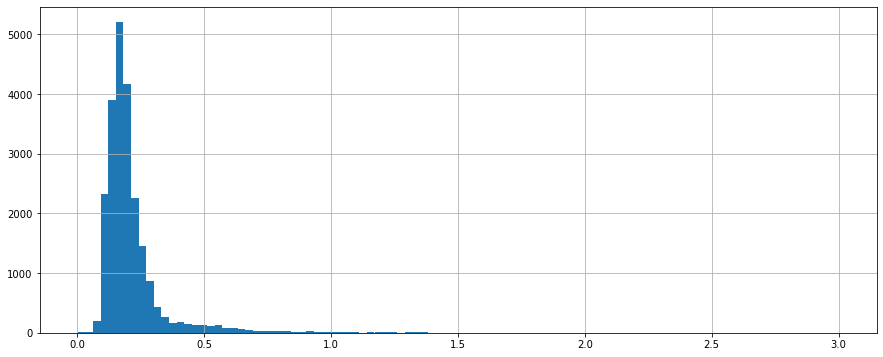

In [12]:
plt.figure(figsize=(15, 6))
df['price_per_m2'].hist(bins=100)
plt.show()

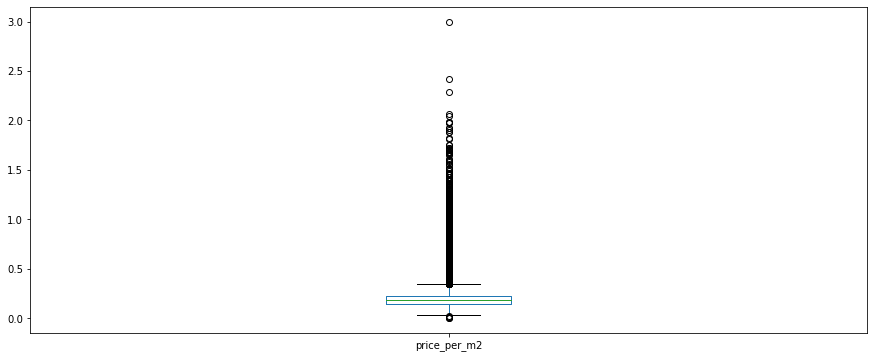

In [13]:
plt.figure(figsize=(15, 6))
df['price_per_m2'].plot(kind='box')
plt.show()

### Przegląd null'i i kolumn z jedną wartością

In [14]:
cols_distr = df.isna().sum(axis=0)/df.shape[0]

In [15]:
def compare_mean_price_isna_notna(df, col_name, price='price'):
    
    df_nna = df[[price, col_name]][df[col_name].notna()]
    df_isna = df[[price, col_name]][df[col_name].isna()]
    
    
    print(str.center('-', 50,'-'))
    print('{} mean price notna (len: {}) is: {}'.format(col_name, len(df_nna), df_nna[price].mean()))
    print('{} mean price  isna (len: {}) is: {}'.format(col_name, len(df_isna), df_isna[price].mean()))    
    print('nunique values: {}'.format(df_nna[col_name].nunique()))
    
    print(str.center('-', 50,'-'))
    print('')

In [16]:
col_names = cols_distr[cols_distr>0.9].index

for col_name in col_names:
    compare_mean_price_isna_notna(df, col_name)

--------------------------------------------------
geo_block_3 mean price notna (len: 2369) is: 8.537244247311827
geo_block_3 mean price  isna (len: 31811) is: 18.197364943785164
nunique values: 76
--------------------------------------------------

--------------------------------------------------
geo_block_4 mean price notna (len: 10) is: 11.076
geo_block_4 mean price  isna (len: 34170) is: 17.526926962687554
nunique values: 7
--------------------------------------------------

--------------------------------------------------
Адрес:_4 mean price notna (len: 2922) is: 21.308654105208333
Адрес:_4 mean price  isna (len: 31258) is: 17.17649592537959
nunique values: 524
--------------------------------------------------

--------------------------------------------------
Адрес:_5 mean price notna (len: 1211) is: 22.61847666970091
Адрес:_5 mean price  isna (len: 32969) is: 17.347185745207852
nunique values: 167
--------------------------------------------------

------------------------

In [17]:
df[obj_feats].nunique().sort_values(ascending=False)

Этаж:               1241
user_block_0         780
Дата публикации:     698
date_0               644
Адрес:_3             639
                    ... 
Холодильник:           2
Интернет:              2
Мебель:                2
Телефон:               2
Адрес:_13              2
Length: 69, dtype: int64

### Piętro

In [18]:
cols_distr['Этаж:']

0.0

In [19]:
df['flat_floor'] = df['Этаж:'].apply(lambda x: int(u.get_list_el(x.split('/'),0)))
df['build_floor'] = df['Этаж:'].apply(lambda x: u.get_list_el(x.split('/'),1))
df['build_floor'] = df['build_floor'].fillna(-1).map(int)

In [20]:
df['floor_rte'] = df['flat_floor']/df['build_floor']
df.loc[df['build_floor']==-1, 'floor_rte'] = -1

In [21]:
df['if_first_last_floor'] = 0
df.loc[df['flat_floor']==1, 'if_first_last_floor'] = 1
df.loc[df['floor_rte']==1, 'if_first_last_floor'] = 2

In [22]:
df.drop(columns=['Этаж:','Этаж:_cat'], inplace=True)

In [23]:
df.sample(5)

,price,id,geo_block_len,geo_block_0,geo_block_1,geo_block_2,geo_block_3,geo_block_4,breadcrumbs_len,breadcrumbs_0,...,Адрес:_7_cat,Адрес:_8_cat,Адрес:_9_cat,Адрес:_11_cat,Адрес:_13_cat,price_per_m2,flat_floor,build_floor,floor_rte,if_first_last_floor
6265,7.13013,44253,2,Соколиная Гора,г. Москва,NaN,NaN,NaN,4,Москва,...,-1,-1,-1,-1,-1,0.178700,12,25,0.480000,0
13813,19.52000,67389,2,г. Москва,проезд Серебрякова,NaN,NaN,NaN,3,Москва,...,-1,-1,-1,-1,-1,0.235181,11,-1,-1.000000,0
33298,NaN,32651,2,Черёмушки,г. Москва,NaN,NaN,NaN,4,Москва,...,-1,-1,-1,-1,-1,NaN,19,24,0.791667,0
7212,7.51000,48667,2,г. Москва,ул Петра Алексеева,NaN,NaN,NaN,3,Москва,...,-1,-1,-1,-1,-1,0.220882,20,28,0.714286,0
20772,23.22240,7085,2,Хорошёво-Мнёвники,г. Москва,NaN,NaN,NaN,4,Москва,...,-1,-1,-1,-1,-1,0.308398,17,19,0.894737,0


### user_block

In [24]:
df['user_block_0'] = df['user_block_0'].fillna('')

In [25]:
for user_block in ['user_block_0','user_block_1']:

    df[user_block] = df[user_block].fillna('')
    
    df[user_block] = df[user_block].apply(lambda x: x.replace('<div class="block-user__name">','user_'))
    df[user_block] = df[user_block].apply(lambda x: x.replace('<div class="block-user__agency">','agency_'))
    df[user_block] = df[user_block].apply(lambda x: x.replace('</div>',''))
        
    df['is_{}_agency'.format(user_block)] = 0
    df.loc[df[user_block].apply(lambda x: 'user' in x), 'is_{}_agency'.format(user_block)] = 1
    df.loc[df[user_block].apply(lambda x: 'agency' in x), 'is_{}_agency'.format(user_block)] = 2
    

### Класс жилья

In [26]:
pd.pivot_table(df, index=["Класс жилья:"], values=["price"], aggfunc=["mean", "median", "min", "max", len])

,mean,median,min,max,len
,price,price,price,price,price
Класс жилья:,,,,,
-1,14.314779,9.30000,1.37,3000.000015,7416.0
Бизнес класс,17.571500,13.86750,3.00,3000.000015,9937.0
Комфорт класс,8.874503,8.19000,1.83,140.000000,13895.0
Эконом класс,9.138992,7.85332,2.28,124.290000,875.0
Элит класс,89.360182,59.89850,1.04,1551.689900,2057.0


In [27]:
def replace_factor_by_stat(df, char_name, stat_name, price):
    "Zastępuję losowy faktor statystyką dla danej cechy"
    
    price_stat = df[price].agg(stat_name)
    
    keys = pd.pivot_table(df, index=[char_name], values=[price], aggfunc=[stat_name]).index
    values = pd.pivot_table(df, index=[char_name], values=[price], aggfunc=[stat_name])[(stat_name,price)]
    char_stat_map = defaultdict(lambda: price_stat,zip(keys, values))
    
    df['{}_repl_{}'.format(char_name, stat_name)] = df[char_name].apply(lambda x: char_stat_map[x]) 
    print('New column in df: {}_repl_{}'.format(char_name, stat_name))
    
    return df   

In [28]:
col_names = ["Тип балкона:", "Класс жилья:", 'geo_block_0', 'geo_block_1', 'geo_block_2', 'geo_block_3', 'geo_block_4',
            'breadcrumbs_0', 'breadcrumbs_1', 'breadcrumbs_2', 'breadcrumbs_3', 'breadcrumbs_4','owner_name',
            'Стиральная машина:', 'Адрес:_13']
stat_names = ['median','mean','count']

for col_name, stat_name in product(col_names, stat_names):

    df = replace_factor_by_stat(df, col_name, stat_name, 'price_per_m2')

New column in df: Тип балкона:_repl_median
New column in df: Тип балкона:_repl_mean
New column in df: Тип балкона:_repl_count
New column in df: Класс жилья:_repl_median
New column in df: Класс жилья:_repl_mean
New column in df: Класс жилья:_repl_count
New column in df: geo_block_0_repl_median
New column in df: geo_block_0_repl_mean
New column in df: geo_block_0_repl_count
New column in df: geo_block_1_repl_median
New column in df: geo_block_1_repl_mean
New column in df: geo_block_1_repl_count
New column in df: geo_block_2_repl_median
New column in df: geo_block_2_repl_mean
New column in df: geo_block_2_repl_count
New column in df: geo_block_3_repl_median
New column in df: geo_block_3_repl_mean
New column in df: geo_block_3_repl_count
New column in df: geo_block_4_repl_median
New column in df: geo_block_4_repl_mean
New column in df: geo_block_4_repl_count
New column in df: breadcrumbs_0_repl_median
New column in df: breadcrumbs_0_repl_mean
New column in df: breadcrumbs_0_repl_count
New 

### Data publikacji

In [29]:
date_map = {'января': 1,
            'февраля':2,
           'марта': 3,
           'апреля': 4,
           'мая': 5,
           'июня': 6,
           'июля':7,
           'августа': 8,
           'сентября': 9,
           'октября': 10,
           'ноября': 11,
           'декабря': 12}

вчера -- wczoraj    
сегодня -- dzisiaj

In [30]:
df['is_today'] = df['Дата публикации:'].map(lambda x: 'сегодня' in x).map(int)
df['is_yesterday'] = df['Дата публикации:'].map(lambda x: 'вчера' in x).map(int)

In [31]:
df['today_time'] = df.loc[df['is_today']==1, 'Дата публикации:'].map(lambda x: datetime.strptime(x[-5:], '%H:%M'))
df['yesterday_time'] = df.loc[df['is_yesterday']==1, 'Дата публикации:'].map(lambda x: datetime.strptime(x[-5:], '%H:%M'))

In [32]:
df.loc[df['is_today']==1, 'Дата публикации:']  = ''
df.loc[df['is_yesterday']==1, 'Дата публикации:']  = ''

In [33]:
def convert_date(date_str): 
    
    date_lst = date_str.split(' ')
    
    if len(date_lst) == 0:
        date = ''
    
    
    if len(date_lst) == 2:
        date_lst[0] = date_lst[0]
        date_lst[1] = str(date_map[date_lst[1]])
        date_lst.append('2019')
        
        date = datetime.strptime('/'.join(date_lst), '%d/%m/%Y')
        return date
 
        
        
    if len(date_lst) == 3:
        date_lst[0] = date_lst[0]
        date_lst[1] = str(date_map[date_lst[1]])
                
        date = datetime.strptime('/'.join(date_lst), '%d/%m/%Y')
    
    

convert_date(df['Дата публикации:'][4])

In [34]:
df['publish_date'] = df['Дата публикации:'].map(convert_date)

In [35]:
df['publish_date'][34178]

NaT

In [51]:
df['publish_date'].max()

Timestamp('2019-05-18 00:00:00')

In [53]:
pd.Timestamp('2019-05-18 00:00:00')

Timestamp('2019-05-18 00:00:00')

In [54]:
df.loc[df['is_today']==1, 'publish_date'] = pd.Timestamp('2019-05-20 00:00:00')
df.loc[df['is_yesterday']==1, 'publish_date'] = pd.Timestamp('2019-05-19 00:00:00')

In [57]:
def convert_date_to_days(publish_date):
    
    try:
        return (date(2019,5,20) - publish_date.date()).days
    except:
        return -1
        
df['publish_days'] = df['publish_date'].map(convert_date_to_days)

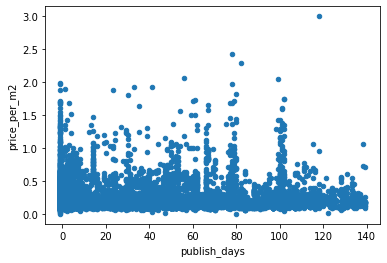

In [59]:
df[['price_per_m2','publish_days']].plot(kind='scatter', x='publish_days',y='price_per_m2');

In [60]:
df[df.price.notna()].to_csv("../interim/02_train_data.csv", sep='|', index=False)
df[df.price.isna()].to_csv("../interim/02_test_data.csv", sep='|', index=False)